In [4]:
# from qiskit import QuantumRegister, ClassicalRegister
# from qiskit import QuantumCircuit, execute,IBMQ
%matplotlib inline
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import RGQFTMultiplier

In [27]:
# Take two numbers as user input in binary form
multiplicand_in = input("Enter the multiplicand: ")
l1 = len(multiplicand_in)
multiplier_in = input("Enter the multiplier: ")
l2 = len(multiplier_in)

#limit: 1111 1111 --> run out of memory
#111 1111 = 127

Enter the multiplicand: 1111111
Enter the multiplier: 1111111


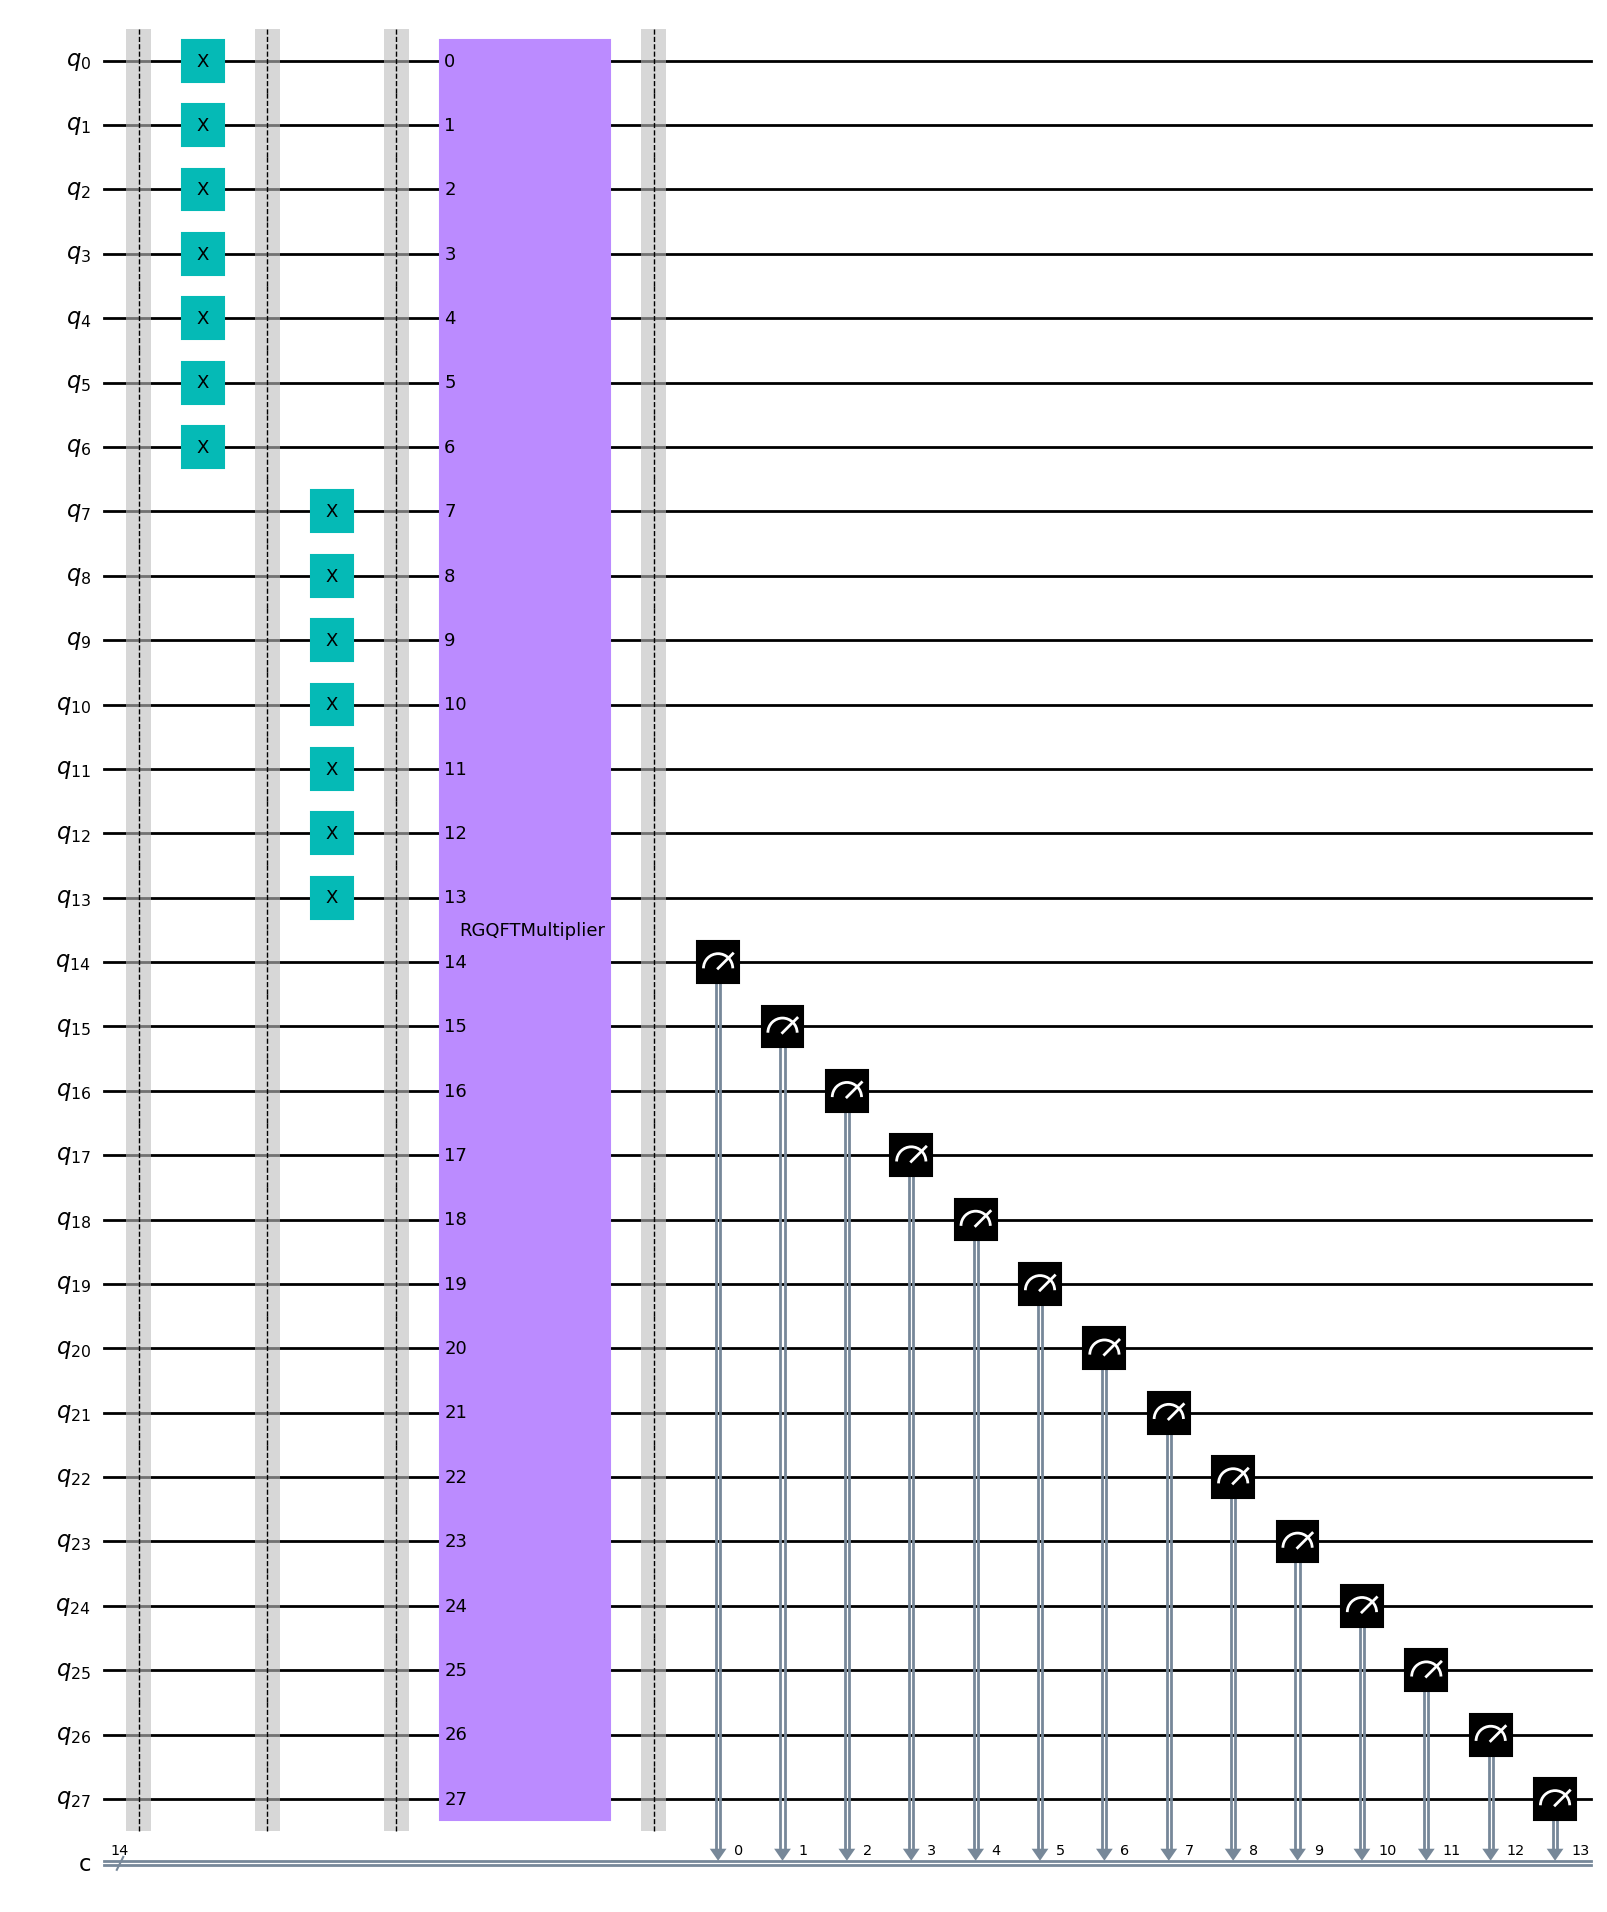

In [28]:
# IBMQ.enable_account('ENTER API KEY HERE')
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = provider.get_backend('ibmq_qasm_simulator')

'''
HARDCODED to multiply 2 and 3 (requires 2 qubits each)
Goal: generalize code to take user input as binary, 
then initialize the registers to correct bits before the multiplication
'''

# For our quantum register we will have 8 qubits:
#    Qubits 0 and 1 hold Operand A which we will use to store 2. 
#    Qubits 2 and 3 hold Operand B which we will use to store 3.
#    Qubits 4 to 7 hold the output qubits that will hold the result. 
# The classical register will hold the result when we measure the output qubits and as such will have 4 bits. 

# q = QuantumRegister(8,'q')
# c = ClassicalRegister(4,'c')
# l1 + l2 + (result_length)

q = QuantumRegister(l1*4, 'q')
c = ClassicalRegister(l1*2, 'c')

circuit = QuantumCircuit(q,c)

circuit.barrier()

# # Operand A = 10 (2)
# circuit.x(q[1])

''' flip (Pauli-X gate) corresponding qubit when user input string is 1 '''

''' multiplicand '''
for ii, yesno in enumerate(reversed(multiplicand_in)):
    if yesno == '1':
        circuit.x(q[ii])

circuit.barrier()

# # Operand B = 11 (3)
# circuit.x(q[2])
# circuit.x(q[3])

''' multiplier '''
for ii, yesno in enumerate(reversed(multiplier_in)):
    if yesno == '1':
        circuit.x(q[ii + l1])

circuit.barrier()

'''
Prerequiste of RGQFTMultiplier is that the multiplier 
and the multiplicand have the same length of bits
'''
# circuit1 = RGQFTMultiplier(num_state_qubits=2, num_result_qubits=4)
circuit1 = RGQFTMultiplier(num_state_qubits=l1, num_result_qubits=l1*2)
circuit = circuit.compose(circuit1)

circuit.barrier()

circuit.measure( range(l1*2,l1*4), range(l1*2) )

# circuit.measure(q[4],c[0])
# circuit.measure(q[5],c[1])
# circuit.measure(q[6],c[2])
# circuit.measure(q[7],c[3])

# print(circuit)
circuit.draw(output='mpl')



In [34]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1)
result = job.result()
counts = result.get_counts()

print(multiplicand_in,'*',multiplier_in,'=',counts)
# 127 * 127 = 16,129

1111111 * 1111111 = {'11111100000001': 1}
